In [1]:
# Import libraries

from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import desc


In [2]:
# Initialize Spark
spark = SparkSession.builder.appName("AI_Impact_Analysis").getOrCreate()

In [3]:
# Load dataset
df = spark.read.csv(r'C:\Users\dines\OneDrive\Desktop\job preparation\eli tech\Global_AI_Content_Impact_Dataset.csv', header=True, inferSchema=True)
print("=== FULL DATASET ===")
df.show(df.count(), truncate=False) 

=== FULL DATASET ===
+-----------+----+-------------+--------------------+------------------------------------------+----------------------+------------------------------+-------------------------------+-----------------+-----------------+------------------------+--------------------------------+
|Country    |Year|Industry     |AI Adoption Rate (%)|AI-Generated Content Volume (TBs per year)|Job Loss Due to AI (%)|Revenue Increase Due to AI (%)|Human-AI Collaboration Rate (%)|Top AI Tools Used|Regulation Status|Consumer Trust in AI (%)|Market Share of AI Companies (%)|
+-----------+----+-------------+--------------------+------------------------------------------+----------------------+------------------------------+-------------------------------+-----------------+-----------------+------------------------+--------------------------------+
|South Korea|2022|Media        |44.29               |33.09                                     |16.77                 |46.12                        

In [4]:

# Data Cleaning
df = df.dropna()  # Remove missing values
print("\n=== CLEANED DATASET (COUNT AFTER DROPPING MISSING VALUES) ===")
print(f"Original: {df.count()} rows | Cleaned: {df.count()} rows")


=== CLEANED DATASET (COUNT AFTER DROPPING MISSING VALUES) ===
Original: 200 rows | Cleaned: 200 rows


In [5]:
# EDA: Top 5 Countries by AI Adoption
print("\n=== TOP 5 COUNTRIES BY AI ADOPTION ===")
df.groupBy("Country").agg({"AI Adoption Rate (%)": "avg"}).orderBy(desc("avg(AI Adoption Rate (%))")).show(5)


=== TOP 5 COUNTRIES BY AI ADOPTION ===
+---------+-------------------------+
|  Country|avg(AI Adoption Rate (%))|
+---------+-------------------------+
|       UK|                   64.692|
|   France|        56.51833333333334|
|Australia|        56.08199999999999|
|    Japan|        54.20954545454545|
|    China|        52.88904761904762|
+---------+-------------------------+
only showing top 5 rows



In [6]:
# Correlation Analysis (AI Content Volume vs. Revenue Increase)
correlation = df.stat.corr("AI-Generated Content Volume (TBs per year)", "Revenue Increase Due to AI (%)")
print(f"Correlation between AI Content Volume and Revenue Increase: {correlation:.2f}")


Correlation between AI Content Volume and Revenue Increase: 0.03


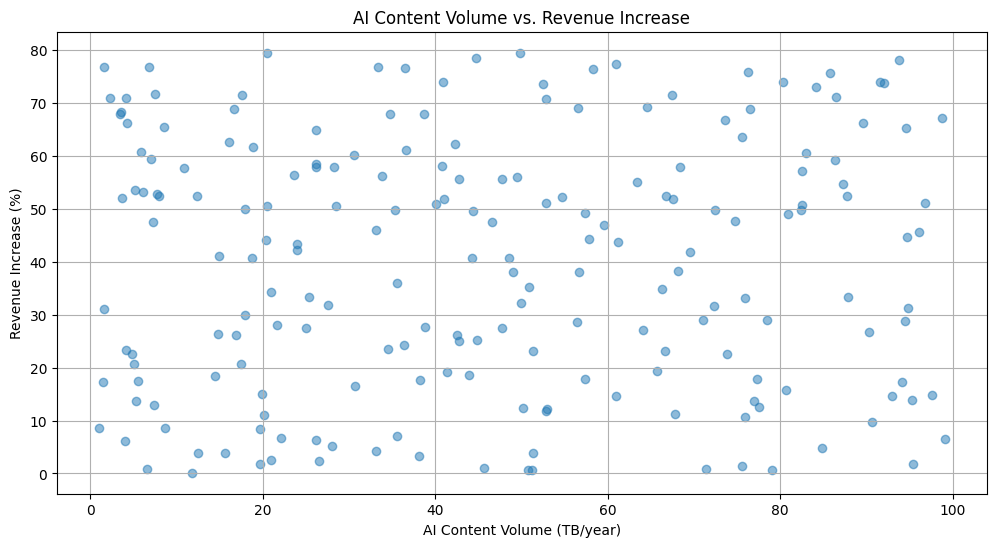

In [7]:
# Visualization
pdf = df.toPandas()
plt.figure(figsize=(12, 6))
plt.scatter(pdf["AI-Generated Content Volume (TBs per year)"], pdf["Revenue Increase Due to AI (%)"], alpha=0.5)
plt.title("AI Content Volume vs. Revenue Increase")
plt.xlabel("AI Content Volume (TB/year)")
plt.ylabel("Revenue Increase (%)")
plt.grid()
plt.show()

spark.stop()